# Clip & Categorize SPEI

a. stein 6.6.2022 - actually started 7.7.2022

Getting SPEI setup to compare to WA USDM, following the work of `explore/usdm_spi_explore_workflow.ipynb`

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import xarray as xr
import rioxarray
import rasterio as rio
import pandas as pd
import geopandas as gpd

import matplotlib.dates as mdates

from tqdm.autonotebook import tqdm

import sys
sys.path.append('../../')
import ndrought.wrangle as wrangle
import ndrought.compare as compare
import ndrought.plotting as ndplot

Populating the interactive namespace from numpy and matplotlib


/pool0/data/steinadi/.conda/envs/sedi/lib/python3.7/site-packages/ipykernel_launcher.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  


Load in USDM and SPEI

In [2]:
dm_path = '/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures'

# USDM will be already clipped, but we'll need to clip spi real quick
usdm = xr.open_dataset(f'{dm_path}/usdm/USDM_WA_20000104_20220412.nc')
spei_1y = xr.open_dataset(f'{dm_path}/spei/spei1y.nc')

In [3]:
spei_1y

<xarray.Dataset>
Dimensions:  (lon: 1386, lat: 585, day: 3066, crs: 1)
Coordinates:
  * lon      (lon) float64 -124.8 -124.7 -124.7 -124.6 ... -67.14 -67.1 -67.06
  * lat      (lat) float64 49.4 49.36 49.32 49.28 ... 25.19 25.15 25.11 25.07
  * day      (day) datetime64[ns] 1980-01-05 1980-01-10 ... 2021-12-31
  * crs      (crs) uint16 3
Data variables:
    spei     (day, lat, lon) float32 ...
Attributes: (12/24)
    geospatial_bounds_crs:      EPSG:4326
    Conventions:                CF-1.6
    geospatial_bounds:          POLYGON((-124.7666666333333 49.40000000000000...
    geospatial_lat_min:         25.066666666666666
    geospatial_lat_max:         49.40000000000000
    geospatial_lon_min:         -124.7666666333333
    ...                         ...
    last_permanent_slice:       3006
    last_early_slice:           3066
    last_provisional_slice:     3060
    note3:                      Data in slices after last_permanent_slice (1-...
    note4:                      Data in slices after last_provisional_slice (...
    note5:                      Days correspond approximately to calendar day...

In [4]:
spei_1y.crs

<xarray.DataArray 'crs' (crs: 1)>
array([3], dtype=uint16)
Coordinates:
  * crs      (crs) uint16 3
Attributes:
    grid_mapping_name:            latitude_longitude
    longitude_of_prime_meridian:  0.0
    semi_major_axis:              6378137.0
    long_name:                    WGS 84
    inverse_flattening:           298.257223563
    GeoTransform:                 -124.7666666333333 0.041666666666666 0  49....
    spatial_ref:                  GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["...

In [5]:
spei_1y_da = spei_1y['spei'].rio.write_crs('EPSG:4326', inplace=True)

Grab some bounds for Washington and check the crs

In [6]:
states_url = 'http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
states_gdf = gpd.read_file(states_url)
wa_gdf = states_gdf[(states_gdf.NAME=='Washington')]

In [7]:
wa_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Clip SPEI to WA

In [8]:
spei_da_wa = wrangle.clip_xarray(spei_1y_da, wa_gdf)

In [9]:
spei_da_wa

<xarray.DataArray 'spei' (day: 3066, lat: 84, lon: 188)>
array([[[        nan,         nan,         nan, ..., -1.01      ,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -1.01      ,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -1.1300001 ,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ..., -0.8000002 ,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -0.9000001 ,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -1.1300001 ,
                 nan,         nan],
...
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]],

       [[        nan,         nan,         nan, ..., -0.8000002 ,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -0.71000004,
                 nan,         nan],
        [        nan,         nan,         nan, ..., -0.8000002 ,
                 nan,         nan],
        ...,
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan],
        [        nan,         nan,         nan, ...,         nan,
                 nan,         nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 48.98 48.94 48.9 48.86 ... 45.65 45.61 45.57 45.53
  * lon      (lon) float64 -124.7 -124.7 -124.6 -124.6 ... -117.0 -117.0 -116.9
  * day      (day) datetime64[ns] 1980-01-05 1980-01-10 ... 2021-12-31
    crs      int64 0
Attributes:
    units:              
    description:        Standardized Precipitation-Evapotranspiration Index
    long_name:          spei1y
    standard_name:      spei1y
    dimensions:         lon lat time
    grid_mapping:       crs
    coordinate_system:  WGS84,EPSG:4326

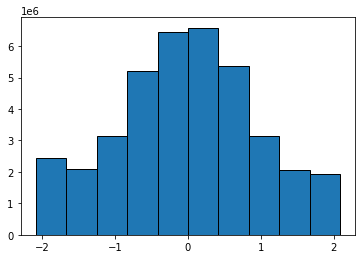

In [10]:
plt.hist(spei_da_wa.values.ravel(), bins=10, edgecolor='k');

### Convert SPEI to USDM Categories

USDM doesn't specifically have a conversion listed for SPEI, although I bet it'd be similar to SPI. However, I'm just going to use the percentiles as follows:

D0 : 21 to 30 p    
D1 : 11 to 20 p    
D2 : 6 to 10 p    
D3 : 3 to 5 p    
D4 : 0 to 2 p

And construct the percentile limits based on the whole distribution

In [11]:
spei_vals = spei_da_wa.values.ravel()
spei_vals = spei_vals[np.isnan(spei_vals) == False]

In [12]:
for p in [30, 20, 10, 5, 2]:
    print(p, f'{np.percentile(spei_vals, p):.2f}')

30 -0.54
20 -0.80
10 -1.28
5 -1.69
2 -2.09


Okay, so pretty close, but still a bit different. Worth the difference in my opinion

In [13]:
def dm_to_usdmcat(da:xr.DataArray):
    """Categorizes drought measure based on USDM categories.

    Uses the mapping scheme presented by USDM (https://droughtmonitor.unl.edu/About/AbouttheData/DroughtClassification.aspx)
    Where Neutral is -1, D0 is 0, D1 is 1, D2, is 2, D3 is 3, and D4 is 4.

    Parameters
    ----------
    da : xr.DataArray
        Contains SPI values.
    
    Returns
    -------
    xr.DataArray
        DataArray formatted the same as da but using USDM categories.

    """

    # make sure we don't overwrite the original
    da_copy = da.copy()
    # can only do boolean indexing on the underlying array
    da_vals = da.values
    da_vals_nonnan = da_vals[np.isnan(da_vals) == False]
    # calculate percentiles
    (p30, p20, p10, p5, p2) = np.percentile(da_vals_nonnan.ravel(), [30, 20, 10, 5, 2])
    # get a copy to make sure reassignment isn't compounding
    da_origin = da_vals.copy()

    # assign neutral
    da_vals[da_origin > p30] = -1
    # assign D0
    da_vals[(da_origin <= p30)&(da_origin > p20)] = 0
    # assign D1
    da_vals[(da_origin <= p20)&(da_origin > p10)] = 1
    # assign D2
    da_vals[(da_origin <= p10)&(da_origin > p5)] = 2
    # assign D3
    da_vals[(da_origin <= p5)&(da_origin > p2)] = 3
    # assign D4
    da_vals[(da_origin <= p2)] = 4

    # put them back into the dataarray
    da_copy.loc[:,:] = da_vals

    return da_copy

In [14]:
def dm_to_usdmcat_multtime(ds:xr.Dataset):
    """Categorizes drought measure based on USDM categories for multiple times.
    
    See dm_to_usdmcat for further documentation.
    
    Parameters
    ----------
    spi_ds : xr.Dataset
        SPI at multiple time values as the coordinate 'day'.
    
    Returns
    -------
    xr.Dataset
        Drought measure categorized by dm_to_usdmcat.
    """
    
    return dm_to_usdmcat(xr.concat([ds.sel(day=day) for day in ds['day'].values], dim='day'))

In [15]:
spei_cat = dm_to_usdmcat_multtime(spei_da_wa)
spei_cat

<xarray.DataArray 'spei' (day: 3066, lat: 84, lon: 188)>
array([[[nan, nan, nan, ...,  1., nan, nan],
        [nan, nan, nan, ...,  1., nan, nan],
        [nan, nan, nan, ...,  1., nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ...,  1., nan, nan],
        [nan, nan, nan, ...,  1., nan, nan],
        [nan, nan, nan, ...,  1., nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ...,  0., nan, nan],
        [nan, nan, nan, ..., -1., nan, nan],
        [nan, nan, nan, ...,  1., nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ...,  0., nan, nan],
        [nan, nan, nan, ...,  0., nan, nan],
        [nan, nan, nan, ...,  1., nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ...,  1., nan, nan],
        [nan, nan, nan, ...,  0., nan, nan],
        [nan, nan, nan, ...,  1., nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 48.98 48.94 48.9 48.86 ... 45.65 45.61 45.57 45.53
  * lon      (lon) float64 -124.7 -124.7 -124.6 -124.6 ... -117.0 -117.0 -116.9
  * day      (day) datetime64[ns] 1980-01-05 1980-01-10 ... 2021-12-31
    crs      int64 0
Attributes:
    units:              
    description:        Standardized Precipitation-Evapotranspiration Index
    long_name:          spei1y
    standard_name:      spei1y
    dimensions:         lon lat time
    grid_mapping:       crs
    coordinate_system:  WGS84,EPSG:4326

Fab, that works

Let's clip all the SPEI and also save out the WA USDM categorized SPEI. Then we'll make the paired dataset

In [16]:
spei_intervals = ['1y', '2y', '5y', '14d', '30d', '90d', '180d', '270d']

for interval in tqdm(spei_intervals):
    spei_ds = xr.open_dataset(f'{dm_path}/spei/spei{interval}.nc')
    spei_da = spei_ds['spei'].rio.write_crs('EPSG:4326', inplace=True)
    spei_da_wa = wrangle.clip_xarray(spei_da, wa_gdf)
    attrs = spei_da_wa.attrs
    attrs['Clipping'] = 'original data was clipped to Washington using http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
    del attrs['grid_mapping']
    spei_da_wa.attrs = attrs

    try:
        os.remove(f'{dm_path}/spei/WA/spei_{interval}.nc')
    except:
        pass

    spei_da_wa.to_netcdf(f'{dm_path}/spei/WA/spei_{interval}.nc')

    # do some gc
    spei_ds = None
    spei_da = None
    spei_da_wa = None
    

  0%|          | 0/8 [00:00<?, ?it/s]

Fab. Now to do the pairing.

I should just be able to use my `compare.pair_to_usdm_date` function

Also looks like the SPEI resolution is the same as SPI resolution, so I'll follow suit in upscaling USDM to SPI ... while it might be helpful to have everything in terms of USDM, including resolution, I rather not make up data by pretending something is higher resolution than it actually is, so will continue to go for whichever has larger resolution.

In [17]:
usdm = xr.open_dataset(f'{dm_path}/usdm/USDM_WA_20000104_20220412.nc')

In [19]:
spei_da_list = [xr.open_dataset(f'{dm_path}/spei/WA/spei_{interval}.nc')[f'spei'] for interval in spei_intervals]

In [22]:
# double check for any coordinate mismatches
for spei in spei_da_list[1:]:
    if len(np.where(spei_da_list[0]['day'].values != spei['day'].values)[0]) != 0:
        print('Time mistmatch')
    if len(np.where(spei_da_list[0]['lat'].values != spei['lat'].values)[0]) != 0:
        print('lat mismatch')
    if len(np.where(spei_da_list[0]['lon'].values != spei['lon'].values)[0]) != 0:
        print('lon mismatch')

Good

In [23]:
usdm_dates = pd.DatetimeIndex(usdm['date'].values)
spei_dates = pd.DatetimeIndex(spei_da_list[0]['day'].values)

pair_dates = compare.pair_to_usdm_date(usdm_dates, spei_dates, 'SPEI Date', realign=True)
pair_dates

/pool0/data/steinadi/.conda/envs/sedi/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
../../ndrought/compare.py:128: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  pair_dates = pair_dates.dropna('index')


,SPEI Date,USDM Date
0,1999-12-31,2000-01-04 00:00:00
1,2000-01-10,2000-01-11 00:00:00
2,2000-01-15,2000-01-18 00:00:00
3,2000-01-25,2000-01-25 00:00:00
4,2000-01-30,2000-02-01 00:00:00
...,...,...
1144,2021-12-06,2021-12-07 00:00:00
1145,2021-12-11,2021-12-14 00:00:00
1146,2021-12-21,2021-12-21 00:00:00
1147,2021-12-26,2021-12-28 00:00:00


In [25]:
spei_usdmcat = dict()

for spei, interval in tqdm(zip(spei_da_list, spei_intervals), total=len(spei_intervals)):
    spei_usdmcat[interval] = compare.dm_to_usdmcat_multtime(spei.sel(day=pair_dates['SPEI Date'].values))

  0%|          | 0/8 [00:00<?, ?it/s]

In [33]:
spei_usdmcat_ds = spei_usdmcat[spei_intervals[0]].copy().to_dataset(name=f'spei_{spei_intervals[0]}')
del spei_usdmcat_ds[f'spei_{spei_intervals[0]}'].attrs['grid_mapping']
spei_usdmcat_ds

<xarray.Dataset>
Dimensions:  (lat: 84, lon: 188, day: 1149)
Coordinates:
  * lat      (lat) float64 48.98 48.94 48.9 48.86 ... 45.65 45.61 45.57 45.53
  * lon      (lon) float64 -124.7 -124.7 -124.6 -124.6 ... -117.0 -117.0 -116.9
  * day      (day) datetime64[ns] 1999-12-31 2000-01-10 ... 2021-12-31
Data variables:
    spei_1y  (day, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan nan

In [35]:
for interval in spei_intervals[1:]:
    spei_usdmcat_ds[f'spei_{interval}'] = spei_usdmcat[interval]
    del spei_usdmcat_ds[f'spei_{interval}'].attrs['grid_mapping']

In [36]:
spei_usdmcat_ds.attrs = {
    'author' : 'a. stein, 7/19/2022',
    'description' : 'Standardized Precipitation Evaporation Index (SPEI) gathered from various time windows, (specified by the value following the underscore), categorized into USDM categories ndrought.compare.dm_to_usdmcat function.',
    'clipping' : 'Clipped to Washington state using http://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_5m.json'
}
spei_usdmcat_ds

<xarray.Dataset>
Dimensions:    (lat: 84, lon: 188, day: 1149)
Coordinates:
  * lat        (lat) float64 48.98 48.94 48.9 48.86 ... 45.65 45.61 45.57 45.53
  * lon        (lon) float64 -124.7 -124.7 -124.6 ... -117.0 -117.0 -116.9
  * day        (day) datetime64[ns] 1999-12-31 2000-01-10 ... 2021-12-31
Data variables:
    spei_1y    (day, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    spei_2y    (day, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    spei_5y    (day, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    spei_14d   (day, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    spei_30d   (day, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    spei_90d   (day, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    spei_180d  (day, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
    spei_270d  (day, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan
Attributes:
    author:       a. stein, 7/19/2022
    description:  Standardized Precipitation Evaporation Index (SPEI) gathere...
    clipping:     Clipped to Washington state using http://eric.clst.org/asse...

In [37]:
spei_usdmcat_ds.to_netcdf(f'{dm_path}/spei/WA/spei_usdmcat_WA.nc')

Now for hte paired dataset

In [41]:
usdm_da = usdm['USDM'].rio.write_crs('EPSG:4326', inplace=True)
usdm_upscale = usdm_da.rio.reproject_match(spei_da_list[0].rio.write_crs('EPSG:4326', inplace=True))

In [42]:
timeless_ds = usdm_upscale.sel(date=pair_dates['USDM Date'].values).to_dataset()
timeless_ds['date'] = pair_dates.index.values
timeless_ds = timeless_ds.rename_dims({'date':'index', 'x':'lon', 'y':'lat'})
timeless_ds = timeless_ds.rename_vars({'date':'index', 'x':'lon', 'y':'lat'})
timeless_ds['USDM Date'] = xr.DataArray(
    pair_dates['USDM Date'].values, 
    dims=['index'], 
    coords=dict(index=pair_dates.index.values)
)
timeless_ds

<xarray.Dataset>
Dimensions:      (index: 1149, lon: 188, lat: 84)
Coordinates:
  * index        (index) int64 0 1 2 3 4 5 6 ... 1143 1144 1145 1146 1147 1148
  * lon          (lon) float64 -124.7 -124.7 -124.6 ... -117.0 -117.0 -116.9
  * lat          (lat) float64 48.98 48.94 48.9 48.86 ... 45.61 45.57 45.53
    spatial_ref  int64 0
Data variables:
    USDM         (index, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    USDM Date    (index) datetime64[ns] 2000-01-04 2000-01-11 ... 2022-01-04

In [43]:
for interval in spei_intervals:
    spei = spei_usdmcat_ds[f'spei_{interval}']
    timeless_ds[f'spei_{interval}'] = xr.DataArray(
        spei.values,
        dims=['index', 'lat', 'lon'],
        coords=dict(
            index=timeless_ds['index'].values,
            lat = spei['lat'].values,
            lon = spei['lon'].values,
        )
    )

In [44]:
timeless_ds

<xarray.Dataset>
Dimensions:      (lat: 84, lon: 188, index: 1149)
Coordinates:
  * lat          (lat) float64 48.98 48.94 48.9 48.86 ... 45.61 45.57 45.53
  * lon          (lon) float64 -124.7 -124.7 -124.6 ... -117.0 -117.0 -116.9
  * index        (index) int64 0 1 2 3 4 5 6 ... 1143 1144 1145 1146 1147 1148
    spatial_ref  int64 0
Data variables:
    USDM         (index, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    USDM Date    (index) datetime64[ns] 2000-01-04 2000-01-11 ... 2022-01-04
    spei_1y      (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    spei_2y      (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    spei_5y      (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    spei_14d     (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    spei_30d     (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    spei_90d     (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    spei_180d    (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    spei_270d    (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan

In [45]:
timeless_ds['SPEI Date'] = xr.DataArray(
    pair_dates['SPEI Date'].values, 
    dims=['index'], 
    coords=dict(index=pair_dates.index.values)
)
timeless_ds

<xarray.Dataset>
Dimensions:      (lat: 84, lon: 188, index: 1149)
Coordinates:
  * lat          (lat) float64 48.98 48.94 48.9 48.86 ... 45.61 45.57 45.53
  * lon          (lon) float64 -124.7 -124.7 -124.6 ... -117.0 -117.0 -116.9
  * index        (index) int64 0 1 2 3 4 5 6 ... 1143 1144 1145 1146 1147 1148
    spatial_ref  int64 0
Data variables:
    USDM         (index, lat, lon) float64 nan nan nan nan ... nan nan nan nan
    USDM Date    (index) datetime64[ns] 2000-01-04 2000-01-11 ... 2022-01-04
    spei_1y      (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    spei_2y      (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    spei_5y      (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    spei_14d     (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    spei_30d     (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    spei_90d     (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    spei_180d    (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    spei_270d    (index, lat, lon) float32 nan nan nan nan ... nan nan nan nan
    SPEI Date    (index) datetime64[ns] 1999-12-31 2000-01-10 ... 2021-12-31

In [46]:
timeless_ds.attrs = {
    'author': 'a. stein 7/19/2022',
    'description': 'USDM and SPEI matched to USDM data cutoff dates, as described by the index for Washington State. USDM has been upscaled to SPEI resolution while SPEI has been categorized according to the USDM drought categories.',
    'USDM Date': 'this contains the original dates for USDM',
    'SPEI Date': 'this contains the original dates for SPEI'
}

In [47]:
try:
    os.remove(f'{dm_path}/ndrought_products/paired_USDM_SPEI.nc')
except:
    pass
timeless_ds.to_netcdf(f'{dm_path}/ndrought_products/paired_USDM_SPEI.nc')

Delightful.